<a href="https://colab.research.google.com/github/Haarini/Fashion-MNIST-Classification/blob/master/Simple_Neural_Network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (3.1.0)


Importing the necessary libraries

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

Importing Fashion MNISt Dataset and dividing into Train and Test dataset

In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

The Fashion MNIST dataset contains 10 calsses namely T-Shirt, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle Boot

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

Exploring the training and testing datasets

In [5]:
num_train_examples=metadata.splits['train'].num_examples
print("Number of Training examples :{}".format(num_train_examples))
num_test_examples=metadata.splits['test'].num_examples
print("Number of Test examples :{}".format(num_test_examples))

Number of Training examples :60000
Number of Test examples :10000


# Preprocessing the data

Creating a normalization function that normalizes [0,255] image data into [0,1]

In [0]:
def normalize(images, labels):
  images=tf.cast(images,tf.float32)
  images /= 255
  return images, labels

train_dataset=train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)

train_dataset=train_dataset.cache()
test_dataset=test_dataset.cache()

Exploring the preprocessed data

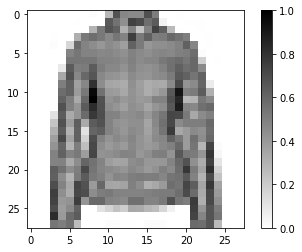

In [7]:
for image, label in test_dataset.take(1):
  break
image=image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.show()

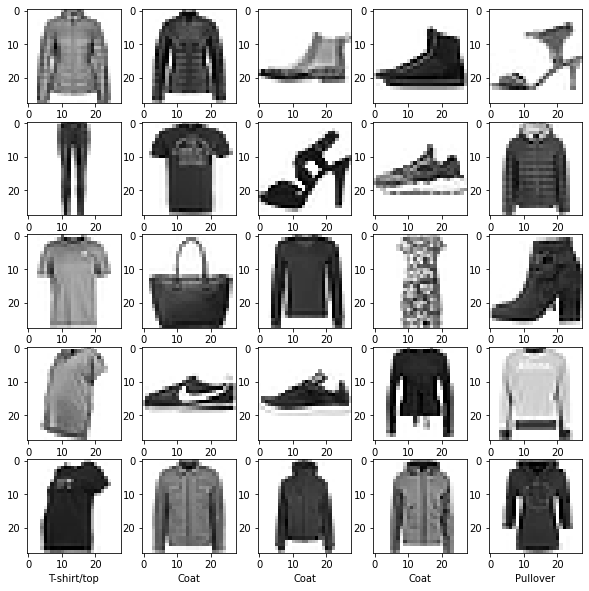

In [8]:
plt.figure(figsize=(10,10))
i=0
for(image,label) in test_dataset.take(25):
  image=image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.imshow(image,cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()

#Building a basic neural network model

This basic neural network model is built using 3 layers namely


*  An input "flatten" layer to transform the 2D image matrix(28*28) into a 1D array
*  A hidden layer that is densely connected with 128 neurons. 
   This will take all the 784 nodes and weigh thm according to hidden parameters which will be used for training purposes.
*  Ouput from previous layer will be fed into the next Dense layer. Each of the node in this 10 node layer will output a logit and will be converted into probablity using the softmax function 

In [0]:
model=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(28,28,1)),
                           tf.keras.layers.Dense(512,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10)])

Compiling the model using SparseCategoricalCrossEntropy and Adam optimizer

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model

In [12]:
batch_size = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(batch_size)
test_dataset = test_dataset.cache().batch(batch_size)
model.fit(train_dataset, epochs=25, steps_per_epoch=math.ceil(num_train_examples/batch_size))

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4748 - accuracy: 0.8278
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3538 - accuracy: 0.8694
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3185 - accuracy: 0.8822
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2973 - accuracy: 0.8892
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2751 - accuracy: 0.8984
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2633 - accuracy: 0.9017
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2542 - accuracy: 0.9036
Epoch 8/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2359 - accuracy: 0.9109
Epoch 9/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2314 - accuracy: 0.9132
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.221

Evaluating the model for training and testing accuracy

In [13]:
train_loss,train_accuracy=model.evaluate(train_dataset,steps=math.ceil(num_train_examples/32))
print('Accuracy on train dataset:',train_accuracy)

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1247 - accuracy: 0.9523
Accuracy on train dataset: 0.9522833228111267
313/313 [==============================] - 2s 5ms/step - loss: 0.3904 - accuracy: 0.8923
Accuracy on test dataset: 0.892300009727478


Predictions using the built model

In [0]:
for test_images,test_labels in test_dataset.take(1):
  test_images=test_images.numpy()
  test_labels=test_labels.numpy()
  predictions=model.predict(test_images)

In [15]:
predictions.shape

(32, 10)

In [16]:
predictions[0]

array([ -9.5589905 , -21.786354  ,   0.07844617, -11.118475  ,
         6.2538824 , -38.74587   ,   2.6362016 , -43.78602   ,
       -21.202372  , -19.23206   ], dtype=float32)

The above array describes the confidence score of the model that the image corresponds to each of the 10 different articles of clothing

Plotting and testing the built model

In [0]:
def plot_image(i,predictions_array,true_labels,images):
  predictions_array,true_label,img=predictions_array[i],true_labels[i],images[i]
  predictions_array=tf.nn.softmax(predictions_array)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0],cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)
  if  predicted_label==true_label:
    color='green'
  else:
    color='red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  predictions_array = tf.nn.softmax(predictions_array)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')


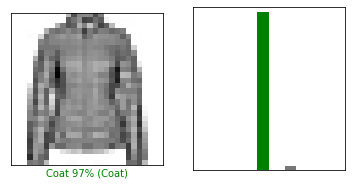

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

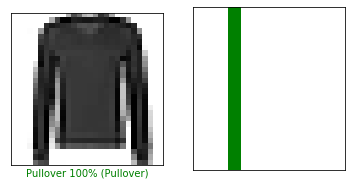

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

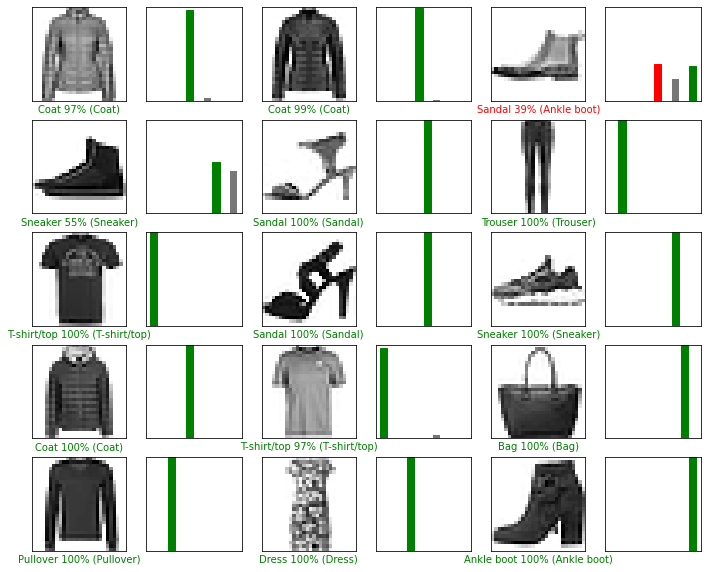

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [21]:
img = test_images[0]

print(img.shape)
img = np.array([img])

print(img.shape)

(28, 28, 1)
(1, 28, 28, 1)


[[ -9.558991   -21.786356     0.07844657 -11.118473     6.2538815
  -38.745884     2.6362019  -43.786026   -21.202375   -19.23206   ]]


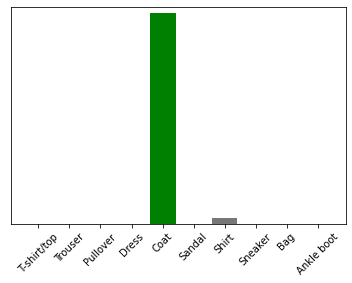

In [22]:
predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)